In [59]:
from keras_segmentation.predict import predict, visualize_segmentation
from keras_segmentation.data_utils.data_loader import get_image_array
import matplotlib.pyplot as plt
import random
import os
import keras
import cv2
import numpy as np
import colorsys
import imgviz

In [72]:
CHECKPOINT = "checkpoints/model_vgg_segnet.01_combined.keras"
IMAGE_DIR = "_data/combined/test"
OUT = "out/test.png"
INPUT_SHAPE = (416, 608)
CLASSES = 25

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
(416, 608, 35)


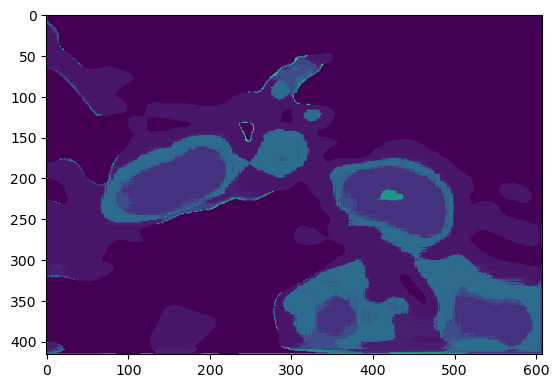

[ 0  1  2  3  4  5  6  7  8 10 11 12 14 15 16 18 19 20 21 22 23 24 26 27
 28 29 30 32 33 34]


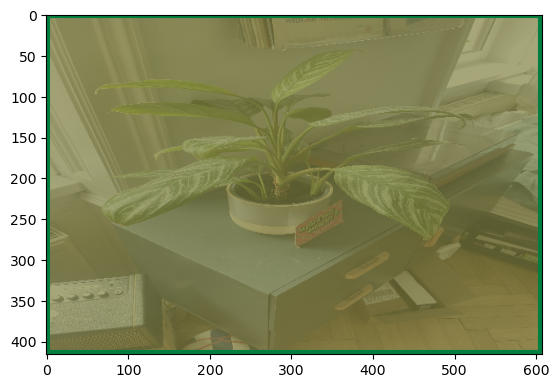

In [82]:
file = os.path.join(IMAGE_DIR, random.sample(os.listdir(IMAGE_DIR), 1)[0])
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x = cv2.resize(img, (INPUT_SHAPE[1], INPUT_SHAPE[0]))

#x = get_image_array(img, INPUT_SHAPE[1], INPUT_SHAPE[0], ordering='channels_last')

model = keras.models.load_model(CHECKPOINT, compile=False)

output = model.predict(np.expand_dims(x, 0))[0]

#softmax:
output_sf = np.exp(output)/sum(np.exp(output))
print(output_sf.shape)

plt.imshow(output_sf.argmax(axis=2) * 100)
plt.show()

print(np.unique(output_sf.argmax(axis=2)))

output = np.transpose(output, (2, 0, 1))

output = output > 0

vis = imgviz.instances2rgb(x, labels=range(35), masks=output, bboxes=imgviz.instances.masks_to_bboxes(output))

plt.imshow(vis)
plt.show()